<a href="https://colab.research.google.com/github/adalves-ufabc/2021.Q3-PLN/blob/main/2021_Q3_PLN_Notebook_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2021.Q3]**
Prof. Alexandre Donizeti Alves

# **Extração de Dados [Texto]**

---





Neste caderno, vamos cobrir várias fontes de dados de texto e maneiras de extraí-los.


***Free source***

Uma grande quantidade de dados está disponível gratuitamente na Internet. Precisamos apenas simplificar o problema e começar a explorar múltiplas fontes de dados gratuitas.

>• Free APIs (Twitter)

>• Wikipedia

>• United States Government data (https://www.data.gov/)

>• United States Census data (https://www.census.gov/data.html)

>• United States Health care claim data (https://www.healthdata.gov/)

>• Weather Service (https://www.weather.gov/)

>• NASA (https://data.nasa.gov/)

>• The World Bank (https://data.worldbank.org/)

>• Datahub (https://datahub.io/)

>• Microdados ENEM (http://portal.inep.gov.br/microdados)

>• Portal Brasileiro de Dados Abertos (https://dados.gov.br/)

### **01. Coletando dados de texto usando APIs**

O **Twitter** tem uma quantidade gigantesca de dados com muito valor. Há uma quantidade enorme de tweets todos os dias, e cada tweet tem uma história para contar. Quando esses dados são coletados e analisados, fornecem uma enorme quantidade de *insights* sobre uma empresa, produto, serviço etc.

O primeiro passo é fazer login no portal do desenvolvedor do Twitter:

> https://developer.twitter.com/en

Crie seu próprio aplicativo (app) no portal do desenvolvedor do Twitter e obtenha as chaves mencionado abaixo. Depois de ter essas credenciais, você pode começar a baixar dados. 

> 

**Chaves necessárias**:
> *consumer key*: chave associada ao aplicativo (Twitter, Facebook etc.)

> *consumer secret*: senha usada para autenticação com o servidor de autenticação (Twitter, Facebook etc.)

> *access token*: chave dada ao cliente após o sucesso de autenticação das chaves acima

> *access token secret*: senha para a chave de acesso


In [ ]:
# install tweepy
#!pip install tweepy

# import the libraries
import tweepy as tw
from tweepy import OAuthHandler

# credentials
with open('/content/twitter-tokens.txt', 'r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    access_token = tfile.readline().strip('\n')
    access_token_secret = tfile.readline().strip('\n')

# calling API
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

# provide the query you want to pull the data
query ="Trump"

# fetching tweets
tweets = api.search(query)
tweets

[Status(_api=<tweepy.api.API object at 0x7f6df9b38650>, _json={'created_at': 'Thu Sep 23 12:30:11 +0000 2021', 'id': 1441017045248847878, 'id_str': '1441017045248847878', 'text': 'RT @TheLeoTerrell: President Trump telephoned and left a very warm and personal message. Thank you President Trump. Next to your family, yo…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'TheLeoTerrell', 'name': 'TheLeoTerrell', 'id': 1212806053907185664, 'id_str': '1212806053907185664', 'indices': [3, 17]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1296096581637341189, 'id_str': '1296096581637341189', 'name': 'Donna Harmon', 'screen_name': 'DonnaHa3

In [ ]:
for tweet in tweets:
     print(f'Usuário: {tweet.user} - Tweet: {tweet.text}')

Usuário: User(_api=<tweepy.api.API object at 0x7f6df9b38650>, _json={'id': 1296096581637341189, 'id_str': '1296096581637341189', 'name': 'Donna Harmon', 'screen_name': 'DonnaHa34711791', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 6, 'friends_count': 83, 'listed_count': 0, 'created_at': 'Wed Aug 19 14:52:46 +0000 2020', 'favourites_count': 5171, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 5345, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.p

In [ ]:
for tweet in tweets:
     print(tweet.text)

RT @TheLeoTerrell: President Trump telephoned and left a very warm and personal message. Thank you President Trump. Next to your family, yo…
RT @OccupyDemocrats: BREAKING: President Bush announces his endorsement of January 6 Committee Chair Liz Cheney, and that he will host a fu…
@seanhannity Still waiting on the trump health care plan....
@LeaderMcConnell Moscow Mitch says the Democrats shouldn't play games with the debt ceiling but last I checked he's… https://t.co/89ET73bkT5
@ksorbs Trump called it out years ago. God bless you Kevin praying for you and Sam. Next project, Systematic Decept… https://t.co/grDfanIw1I
RT @reportersalles: "Foi intencional", Wei Jingsheng afirma ter alertado a administração Trump sobre a existência do vírus em novembro de 2…
@760Mark @donttrusttrump1 @britttgriffith @JackPosobiec @jaketapper So let’s take Cloward/Piven. You’re telling me… https://t.co/XJj2fAjm9I
RT @jsolomonReports: Biden Security Adviser Jake Sullivan Tied to Alleged 2016 Clinton Scheme 

In [ ]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

https://t.co/aUypG6yQMj transmissível, #variantedelta do novo #coronavírus desafia controle da #pandemia de… https://t.co/YBu0EaKgBv
RT @LdaFCosta: The Linear least squares method - LLS - is a well-established optimization approach with applications in several areas.  In…
RT @LdaFCosta: Before patterns can be recognized, they need to be generated.  In this work, we address the intrinsic relationship between p…
RT @LdaFCosta: Lagrange multipliers can be applied in a wide variety of problems, theoretical and applied.  For a recent introduction: http…
RT @LdaFCosta: Network science applied to study the historical developments, focused on junction transistors, that shaped modern electronic…
RT @earthcurated: Senja, Norway ✨ https://t.co/AX63XIgWqR
https://t.co/AjoIFmbDDA Especialista em #física de #astropartículas, Angela Villela Olinto teve trajetória recentem… https://t.co/xsq36eTS7O
https://t.co/qUqPfx0fyT Museu alemão se recusa a devolver #fóssil de #dinossauro contrabandeado do Brasil

In [ ]:
user = api.get_user('adalves17')

print(user.screen_name)

adalves17


In [ ]:
print(user.followers_count)

3


In [ ]:
for follower in user.followers():
   print(follower.screen_name)

rcprati
gersonpech
jmenac


In [ ]:
print(user.friends_count)

15


In [ ]:
for friend in user.friends():
   print(friend.screen_name)

rcprati
dadosdepesquisa
Lab_iMetrics
ciemrevista
NatureIndex
RodrigoCostas1
LudoWaltman
neesjanvaneck
QSS_ISSI
LdaFCosta
BVFAPESP
lutzbornmann
cwtsleiden
PesquisaFapesp
jmenac


**Mais informações em**:

> http://docs.tweepy.org/en/latest/


### **02. Coletando dados a partir de um documento em PDF**


In [ ]:
# install and import all the necessary libraries
!pip install PyPDF2
import PyPDF2

In [ ]:
# creating a pdf file object
pdf = open("/content/meetingminutes.pdf","rb")

In [ ]:
# creating pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdf)

In [ ]:
# checking number of pages in a pdf file
print(pdfReader.numPages)

19


In [ ]:
# creating a page object
page = pdfReader.getPage(0)

In [ ]:
# finally extracting text from the page
print(page.extractText())

OOFFFFIICCIIAALL  BBOOAARRDD  MMIINNUUTTEESS   Meeting of 
March 7
, 2014
        
     The Board of Elementary and Secondary Education shall provide leadership and 
create policies for education that expand opportunities for children, empower 
families and communities, and advance Louisiana in an increasingly 
competitive glob
al market.
 BOARD 
 of ELEMENTARY
 and 
 SECONDARY
 EDUCATION
  


In [ ]:
# closing the pdf file
pdf.close()

**Mais exemplos em**:

> https://github.com/mstamy2/PyPDF2

### **03. Coletando dados a partir de um documento Word**

In [ ]:
#install and import library (Python3)
!pip install python-docx
import docx

In [ ]:
# creating word reader object
doc = docx.Document('/content/demo.docx')

In [ ]:
# the paragraph is the primary block-level object in Word document
len(doc.paragraphs)

7

In [ ]:
doc.paragraphs[0].text

'Document Title'

In [ ]:
doc.paragraphs[1].text

'A plain paragraph with some bold and some italic'

In [ ]:
# An inline object is a portion of the content that occurs inside a block-level item. 
# An example would be a word that appears in bold or a sentence in all-caps. 
# The most common inline object is a run. 
# All content within a block container is inside of an inline object. 
# Typically, a paragraph contains one or more runs, each of which 
# contain some part of the paragraph’s text
len(doc.paragraphs[1].runs)

5

In [ ]:
doc.paragraphs[1].runs[0].text

'A plain paragraph with'

In [ ]:
doc.paragraphs[1].runs[1].text

' some '

In [ ]:
doc.paragraphs[1].runs[2].text

'bold'

In [ ]:
doc.paragraphs[1].runs[3].text

' and some '

In [ ]:
doc.paragraphs[1].runs[4].text

'italic'

In [ ]:
def getText(filename):
   doc = docx.Document(filename)
   fullText = []
   for para in doc.paragraphs:
      fullText.append(para.text)
   return '\n'.join(fullText)

In [ ]:
print(getText('/content/demo.docx'))

Document Title
A plain paragraph with some bold and some italic
Heading, level 1
Intense quote
first item in unordered list
first item in ordered list




**Mais exemplos em**:
> https://python-docx.readthedocs.io/en/latest/index.html

> https://python-docx.readthedocs.io/en/latest/user/text.html

### **04. Criando um documento Word**

In [ ]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Document Title', 0)

p = document.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph(
    'first item in unordered list', style='List Bullet'
)
document.add_paragraph(
    'first item in ordered list', style='List Number'
)

document.add_picture('/content/monty-truth.png', width=Inches(1.25))

records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=3)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

document.save('/content/demo2.docx')

**Mais exemplos em**:
> https://python-docx.readthedocs.io/en/latest/index.html

### **05. Coletando dados armazenados no formato JSON**

O JSON (*JavaScript Object Notation*) é um formato de arquivo para manter e trocar informações legíveis pelas pessoas. O arquivo contém apenas texto e usa a extensão *.json*.

O JSON é um formato que armazena informações estruturadas e é principalmente usado para transferir dados entre um servidor e um cliente.

O arquivo é basicamente uma alternativa simples e mais leve ao XML (*Extensive Markup Language*), que tem funções similares.

In [ ]:
import requests
import json

r = requests.get("https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent = 4)) 

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "Meaning is something you build into your life. You build it out of your own past, out of your affections and loyalties, out of the experience of humankind as it is passed on to you... You are the only one who can put them together into that unique pattern that will be your life.",
                "length": "281",
                "author": "John Gardner",
                "tags": [
                    "existence",
                    "inspire",
                    "life",
                    "meaning"
                ],
                "category": "inspire",
                "language": "en",
                "date": "2021-09-23",
                "permalink": "https://theysaidso.com/quote/john-gardner-meaning-is-something-you-build-into-your-life-you-build-it-out-of-y",
                "id": "0dnJB1FQHoDklJmvdpIseQeF",
                "background": "https://theysaidso.

In [ ]:
# extract contents
q = res['contents']['quotes'][0] 
q

{'author': 'John Gardner',
 'background': 'https://theysaidso.com/img/qod/qod-inspire.jpg',
 'category': 'inspire',
 'date': '2021-09-23',
 'id': '0dnJB1FQHoDklJmvdpIseQeF',
 'language': 'en',
 'length': '281',
 'permalink': 'https://theysaidso.com/quote/john-gardner-meaning-is-something-you-build-into-your-life-you-build-it-out-of-y',
 'quote': 'Meaning is something you build into your life. You build it out of your own past, out of your affections and loyalties, out of the experience of humankind as it is passed on to you... You are the only one who can put them together into that unique pattern that will be your life.',
 'tags': ['existence', 'inspire', 'life', 'meaning'],
 'title': 'Inspiring Quote of the day'}

In [ ]:
# extract only quote
print(q['quote'], '\n--', q['author'])

Meaning is something you build into your life. You build it out of your own past, out of your affections and loyalties, out of the experience of humankind as it is passed on to you... You are the only one who can put them together into that unique pattern that will be your life. 
-- John Gardner


### **06. Coletando dados a partir de páginas HTML**

In [ ]:
!pip install bs4
import urllib.request as urllib2 
from bs4 import BeautifulSoup

In [ ]:
response = urllib2.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
html_doc = response.read()

In [ ]:
# parsing the HTML file
soup = BeautifulSoup(html_doc, 'html.parser')

# formating the parsed html file
strhtm = soup.prettify()

# print few lines
print (strhtm[:1000])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Natural language processing - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"86761601-e346-42b9-8b20-3142106073b1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":1043661253,"wgRevisionId":1043661253,"wgArticleId":21652,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: location","Articles with short description","Short description matches Wikidata","Commons category

In [ ]:
# extracting tag value
print(soup.title)
print(soup.title.string)
print(soup.a.string)
print(soup.b.string)

<title>Natural language processing - Wikipedia</title>
Natural language processing - Wikipedia
None
Natural language processing


In [ ]:
# extracting all instances of a particular tag
for x in soup.find_all('a'): 
  print(x.string)

None
Jump to navigation
Jump to search
Language processing in the brain
None
None
automated online assistant
customer service
[1]
linguistics
computer science
artificial intelligence
natural language
speech recognition
natural language understanding
natural language generation
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
edit
History of natural language processing
Alan Turing
Computing Machinery and Intelligence
Turing test
edit
John Searle
Chinese room
Georgetown experiment
automatic translation
[2]
ALPAC report
statistical machine translation
SHRDLU
blocks worlds
ELIZA
Rogerian psychotherapist
Joseph Weizenbaum
ontologies
chatterbots
PARRY
HPSG
generative grammar
[3]
Lesk algorithm
[4]
Rhetorical Structure Theory
Racter
Jabberwacky
[5]
edit
machine learning
Moore's law
Chomskyan
transformational grammar
corpus linguistics
[6]
machine translation
textual corpora
Parliament of Canada
European Union
unsupervised
semi-supervised lear

In [ ]:
# extracting all text of a particular tag
for x in soup.find_all('p'): 
  print(x.text)

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.  The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.

Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.

Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated inter

### **07. Análise de texto usando Expressões Regulares**

In [ ]:
# import library
import re

# run the split query
re.split('\s+','I like this book.')

['I', 'like', 'this', 'book.']

In [ ]:
# extracing email IDs
doc = "For more details please mail us at: xyz@abc.com, pqr@mno.com"

addresses = re.findall(r'[\w\.-]+@[\w\.-]+', doc)
for address in addresses: 
  print(address)

xyz@abc.com
pqr@mno.com


In [ ]:
# replacing email IDs
doc = "For more details please mail us at xyz@abc.com"

new_email_address = re.sub(r'([\w\.-]+)@([\w\.-]+)', r'pqr@mno.com', doc)
print(new_email_address)

For more details please mail us at pqr@mno.com


In [ ]:
# import library
import re
import requests

# url you want to extract
url = 'https://www.gutenberg.org/files/2638/2638-0.txt'

# function to extract
def get_book(url):

 # sends a http request to get the text from project Gutenberg
 raw = requests.get(url).text
 
 # discards the metadata from the beginning of the book
 start = re.search(r"\*\*\* START OF THE PROJECT GUTENBERG EBOOK .* \*\*\*",raw ).end()
 
 # discards the metadata from the end of the book
 stop = re.search(r"II\.", raw).start()
 
 # keeps the relevant text
 text = raw[start:stop]
 return text

# processing
def preprocess(sentence): 
 return re.sub('[^A-Za-z0-9.]+' , ' ', sentence).lower()

# calling the above function
book = get_book(url)

processed_book = preprocess(book)
print(processed_book)

 the idiot by fyodor dostoyevsky translated by eva martin contents part i part ii part iii part iv part i i. towards the end of november during a thaw at nine o clock one morning a train on the warsaw and petersburg railway was approaching the latter city at full speed. the morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking and it was impossible to distinguish anything more than a few yards away from the carriage windows. some of the passengers by this particular train were returning from abroad but the third class carriages were the best filled chiefly with insignificant persons of various occupations and degrees picked up at the different stations nearer town. all of them seemed weary and most of them had sleepy eyes and a shivering expression while their complexions generally appeared to have taken on the colour of the fog outside. when day dawned two passengers in one of the third class carriages found themselves opposite each ot

In [ ]:
# perform some exploratory data analysis on this data using regex

# count number of times "the" is appeared in the book
len(re.findall(r'the', processed_book))

302

In [ ]:
# replace "i" with "I"
processed_book = re.sub(r'\si\s', " I ", processed_book)
print(processed_book)

 the idiot by fyodor dostoyevsky translated by eva martin contents part I part ii part iii part iv part I i. towards the end of november during a thaw at nine o clock one morning a train on the warsaw and petersburg railway was approaching the latter city at full speed. the morning was so damp and misty that it was only with great difficulty that the day succeeded in breaking and it was impossible to distinguish anything more than a few yards away from the carriage windows. some of the passengers by this particular train were returning from abroad but the third class carriages were the best filled chiefly with insignificant persons of various occupations and degrees picked up at the different stations nearer town. all of them seemed weary and most of them had sleepy eyes and a shivering expression while their complexions generally appeared to have taken on the colour of the fog outside. when day dawned two passengers in one of the third class carriages found themselves opposite each ot

In [ ]:
# find all occurance of text in the format "abc-xyz"
re.findall(r'[a-zA-Z0-9]*-[a-zA-Z0-9]*', book)

['third-class',
 'third-class',
 'third-class',
 'twenty-seven',
 'death-like',
 'self-satisfied',
 'twenty-six',
 'twenty-seven',
 'un-Russian',
 'black-haired',
 'black-haired',
 'fair-haired',
 'black-haired',
 'black-haired',
 'set-up',
 'red-nosed',
 'fair-haired',
 'all-knowing',
 'black-haired',
 'red-nosed',
 'black-haired',
 'blotchy-faced',
 'safety-valve',
 'red-nosed',
 'hair-dresser',
 'fifty-five',
 'opera-house',
 'drawing-room',
 'twenty-five',
 'public-houses',
 'dark-clouded',
 'passers-by']

### **08. Manipulando strings**

In [ ]:
String_v1 = "I am exploring NLP"

# to extract particular character or range of characters from string
print(String_v1[0])

# to extract exploring
print(String_v1[5:14])

String_v2 = String_v1.replace("exploring", "learning")
print(String_v2)

I
exploring
I am learning NLP


In [ ]:
s1 = "nlp"
s2 = "machine learning"
s3 = s1+s2
print(s3)

nlpmachine learning


In [ ]:
# use find function to fetch the starting index value of the sub string in whole string.

var = "I am learning NLP"
f = "learn"
var.find(f)

5

### **09. *Web Scraping***

*Web scraping* é um termo para se referir ao uso de um programa para fazer download e processar conteúdos da Web.

**Download de uma página Web com a função `requests.get()`**

In [ ]:
import requests

response = requests.get('http://www.gutenberg.org/files/1112/1112.txt')
type(response)


requests.models.Response

In [ ]:
response.status_code == requests.codes.ok

True

In [ ]:
len(response.text)

179410

In [ ]:
print(response.text[:250])

The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare


*******************************************************************
THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES PRODUCED AT A
TIME WHEN PROOFING METHODS AND TOOL


**Fazendo parse de HTML com o módulo `BeautifulSoup`**

O `BeautifulSoup` é um módulo usado para extrair informações de uma página HTML 

In [ ]:
import requests, bs4

response = requests.get('https://nostarch.com')
response.raise_for_status()

page = bs4.BeautifulSoup(response.text, 'html.parser')
type(page)

bs4.BeautifulSoup

In [ ]:
# encontrando um elemento com o metodo select()
pElems = page.select('p')
type(pElems)

list

In [ ]:
len(pElems)

56

In [ ]:
str(pElems[0])

'<p class="cart-block-items collapsed uc-cart-empty">There are no products in your shopping cart.</p>'

In [ ]:
pElems[0].getText()

'There are no products in your shopping cart.'

In [ ]:
str(pElems[2])

'<p><a href="/lego-space-projects">LEGO Space Projects</a> features 52 galactically creative new models, complete with step-by-step instructions and stunning full-color photography.</p>'

In [ ]:
pElems[2].getText()

'LEGO Space Projects features 52 galactically creative new models, complete with step-by-step instructions and stunning full-color photography.'

In [ ]:
# obtendo dados dos atributos de um elemento
import bs4

soup = bs4.BeautifulSoup(open('/content/example.html'), 'html.parser')
spanElem = soup.select('span')[0]
str(spanElem)

'<span id="author">Al Sweigart</span>'

In [ ]:
spanElem.get('id')

'author'

In [ ]:
spanElem.attrs

{'id': 'author'}

**Busca no Google**

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import urllib.parse
from urllib.parse import urlparse

def googleSearch(query):
    g_clean = [ ] 
    url = 'https://www.google.com/search?client=ubuntu&channel=fs&q={}&ie=utf-8&oe=utf-8'.format(query) 
    try:
            html = requests.get(url)
            if html.status_code==200:
                soup = BeautifulSoup(html.text, 'lxml')
                a = soup.find_all('a') 
                for i in a:
                    k = i.get('href')
                    try:
                        m = re.search("(?P<url>https?://[^\s]+)", k)
                        n = m.group(0)
                        rul = n.split('&')[0]
                        domain = urlparse(rul)
                        if(re.search('google.com', domain.netloc)):
                            continue
                        else:
                            g_clean.append(rul)
                    except:
                        continue
    except Exception as ex:
            print(str(ex))
    finally:
            return g_clean

In [ ]:
googleSearch("ufabc")

['https://www.ufabc.edu.br/',
 'https://prograd.ufabc.edu.br/cursos',
 'https://propg.ufabc.edu.br/',
 'https://prograd.ufabc.edu.br/sisu',
 'https://prograd.ufabc.edu.br/',
 'https://www.ufabc.edu.br/en/',
 'https://proap.ufabc.edu.br/bolsas-socioeconomicas/bolsas-e-auxilios',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23History_and_expansion',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23Undergraduate_teaching',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23Research',
 'https://en.wikipedia.org/wiki/Federal_University_of_ABC%23Infrastructure',
 'https://www.usnews.com/education/best-global-universities/universidade-federal-do-abc-ufabc-528920',
 'https://www.timeshighereducation.com/world-university-rankings/universidade-federal-do-abc-ufabc',
 'https://www.instagram.com/ufabc/%3Fhl%3Den',
 'https://www.topuniversities.com/universities/universidade-federal-do-abc']

**Referência**:

> https://medium.com/@ajaypanthagani/heres-how-you-can-scrape-google-search-results-with-python-fa45d09a95a2


**Web Scraping**

In [ ]:
!pip install BeautifulSoup4

In [ ]:
import requests 
import bs4 
import pandas as pd 
  
# make requests from webpage 
url = 'https://www.worldometers.info/coronavirus/country/india/'
result = requests.get(url) 
  
# creating soup object 
soup = bs4.BeautifulSoup(result.text,'lxml') 
  
# searching div tags having maincounter-number class 
cases = soup.find_all('div' ,class_= 'maincounter-number') 
 
# list to store number of cases 
data = [] 
  
# find the span and get data from it 
for i in cases: 
    span = i.find('span') 
    data.append(span.string) 
  
# dispaly number of cases  
print(data) 
    
# creating dataframe 
df = pd.DataFrame({"CoronaData": data}) 
  
# naming the coloumns 
df.index = ['TotalCases', ' Deaths', 'Recovered'] 

# exporting data into Excel 
df.to_csv('Corona_Data.csv')

['33,563,421 ', '446,080', '32,815,731']


**Referência**:

> https://www.geeksforgeeks.org/web-scraping-coronavirus-data-into-ms-excel/


In [ ]:
# importing libraries 
from bs4 import BeautifulSoup as bs
import requests 
    
# method to get the info 
def get_info(country_name): 
      
    # creating url using country name 
    url = "https://www.worldometers.info/coronavirus/country/" + country_name + "/"
      
    # getting the request from url  
    data = requests.get(url) 
  
    # converting the text  
    soup = bs(data.text, 'html.parser')    
      
    # finding meta info for cases 
    cases = soup.find_all("div", class_ = "maincounter-number") 
      
    # getting total cases number 
    total = cases[0].text 
      
    # filtering it 
    total = total[1 : len(total) - 2] 
       
    # getting recovered cases number 
    recovered = cases[2].text 
      
    # filtering it 
    recovered = recovered[1 : len(recovered) - 1] 
      
    # getting death cases number 
    deaths = cases[1].text 
      
    # filtering it 
    deaths = deaths[1 : len(deaths) - 1] 
      
    # saving details in dictionary 
    ans ={'Total Cases' : total, 'Recovered Cases' : recovered, 
                                 'Total Deaths' : deaths} 
      
    # returnng the dictionary 
    return ans 
   
# setting country name 
country_name = "us"
  
# calling the get_info method 
us = get_info(country_name) 
  
# printing the results for us 
print("Cases in United States") 
for i, j in us.items(): 
    print(i + " : " + j) 
      
print("----------------------------")   
# setting country name to Brazil 
country_name = "brazil"
  
# calling the get_info method 
brazil = get_info(country_name) 
  
# printing the results for us 
print("Cases in Brazil") 
for i, j in brazil.items(): 
    print(i + " : " + j) 


Cases in United States
Total Cases : 43,404,877
Recovered Cases : 32,947,854
Total Deaths : 699,748
----------------------------
Cases in Brazil
Total Cases : 21,283,567
Recovered Cases : 20,295,538
Total Deaths : 592,357


**Referência**:

> https://www.geeksforgeeks.org/python-details-of-coronavirus-cases-in-various-countries/

***Web Scraping* [*Top 250 movies from the IMDB*]**
> https://www.imdb.com/chart/top?ref_=nv_mv_250.

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv

In [ ]:
url = "https://www.imdb.com/chart/top?ref_=nv_mv_250"

page = requests.get(url)

soup = BeautifulSoup(page.text, "html.parser")

raw_html = soup.find("tbody", {"class": "lister-list"}).findAll("tr")

In [ ]:
def main_fun():
    movies_list = []
    for html in raw_html:
        title = html.find("td", {"class":"titleColumn"}).find("a").get_text()

        rating = html.find("td", {"class":"ratingColumn imdbRating"}).find("strong").get_text()
        rating = float(rating)

        raw_list = [title, rating]
        movies_list.append(raw_list)

    recomendation(movies_list)
    create_csv(movies_list)

In [ ]:
def recomendation(m_list):
    print("Enter you rating for recomendation:")
    user_rating = input()
    user_rating = float(user_rating)
    for x in range(len(m_list)):
        if m_list[x][1] > user_rating:
            print(m_list[x][0])

In [ ]:
def create_csv(movies):
    with open('movies.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        row = ['Name', 'Rating']
        writer.writerow(row)
        for x in range(len(movies)):
            row = movies[x]
            writer.writerow(row)
    csvfile.close()

In [ ]:
main_fun()

Enter you rating for recomendation:
9
The Shawshank Redemption
The Godfather


**Referência**:
> https://youtu.be/qstdzOAbt78

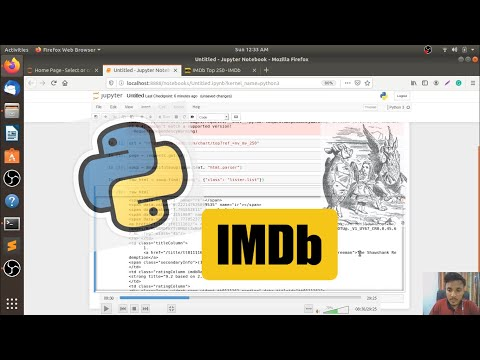

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('qstdzOAbt78', width=550, height=310))

### **10. Coletando dados a partir de arquivos CSV**

Um arquivo **CSV** (*Comma Separated Values*) é um tipo de arquivo de texto simples que usa uma estrutura específica para organizar dados tabulares. Por ser um arquivo de texto simples, ele pode conter apenas dados de texto reais - em outras palavras, caracteres ASCII ou Unicode imprimíveis.

A estrutura de um arquivo CSV é fornecida por seu nome. Normalmente, os arquivos CSV usam uma vírgula para separar cada valor de dados específico. Esta é a aparência dessa estrutura:


> **CSV**
---
> column 1 name,column 2 name, column 3 name

> first row data 1,first row data 2,first row data 3

> second row data 1,second row data 2,second row data 3


In [ ]:
import csv

exampleFile = open('/content/example.csv')
exampleReader = csv.reader(exampleFile)
exampleData = list(exampleReader)
exampleData

[['4/5/2014 13:34', 'Apples', '73'],
 ['4/5/2014 3:41', 'Cherries', '85'],
 ['4/6/2014 12:46', 'Pears', '14'],
 ['4/8/2014 8:59', 'Oranges', '52'],
 ['4/10/2014 2:07', 'Apples', '152'],
 ['4/10/2014 18:10', 'Bananas', '23'],
 ['4/10/2014 2:40', 'Strawberries', '98']]

In [ ]:
print (exampleData[0][0] )
print (exampleData[0][1] )
print (exampleData[5][1] )

4/5/2014 13:34
Apples
Bananas


In [ ]:
# reading Data from reader Objects in a for Loop

import csv

exampleFile = open('/content/example.csv')
exampleReader = csv.reader(exampleFile)

for row in exampleReader:
   print('Row #' + str(exampleReader.line_num) + ' ' + str(row))

Row #1 ['4/5/2014 13:34', 'Apples', '73']
Row #2 ['4/5/2014 3:41', 'Cherries', '85']
Row #3 ['4/6/2014 12:46', 'Pears', '14']
Row #4 ['4/8/2014 8:59', 'Oranges', '52']
Row #5 ['4/10/2014 2:07', 'Apples', '152']
Row #6 ['4/10/2014 18:10', 'Bananas', '23']
Row #7 ['4/10/2014 2:40', 'Strawberries', '98']


In [ ]:
import csv

outputFile = open('output.csv', 'w', newline='')
outputWriter = csv.writer(outputFile)

# retorna o numero de caracters gravados
outputWriter.writerow(['spam', 'eggs', 'bacon', 'ham'])

outputWriter.writerow(['Hello, world!', 'eggs', 'bacon', 'ham'])
outputWriter.writerow([1, 2, 3.141592, 4])

outputFile.close()

In [ ]:
import csv
exampleFile = open('/content/exampleWithHeader.csv')
exampleDictReader = csv.DictReader(exampleFile)
for row in exampleDictReader:
  print(row['Timestamp'], row['Fruit'], row['Quantity'])

4/5/2014 13:34 Apples 73
4/5/2014 3:41 Cherries 85
4/6/2014 12:46 Pears 14
4/8/2014 8:59 Oranges 52
4/10/2014 2:07 Apples 152
4/10/2014 18:10 Bananas 23
4/10/2014 2:40 Strawberries 98


In [ ]:
import csv

outputFile = open('output2.csv', 'w', newline='')
outputDictWriter = csv.DictWriter(outputFile, ['Name', 'Pet', 'Phone'])
outputDictWriter.writeheader()
outputDictWriter.writerow({'Name': 'Alice', 'Pet': 'cat', 'Phone': '555-1234'})
outputDictWriter.writerow({'Name': 'Bob', 'Phone': '555-9999'})
outputDictWriter.writerow({'Phone': '555-5555', 'Name': 'Carol', 'Pet':'dog'})

outputFile.close()

In [ ]:
import pandas

df = pandas.read_csv('output2.csv', delimiter=',')
print(df)

    Name  Pet     Phone
0  Alice  cat  555-1234
1    Bob  NaN  555-9999
2  Carol  dog  555-5555


In [ ]:
df.head()

Name  Pet     Phone
0  Alice  cat  555-1234
1    Bob  NaN  555-9999
2  Carol  dog  555-5555

In [ ]:
print(type(df['Name'][0]))

<class 'str'>


In [ ]:
import pandas

df = pandas.read_csv('output2.csv', index_col='Phone')
print(df)


           Name  Pet
Phone               
555-1234  Alice  cat
555-9999    Bob  NaN
555-5555  Carol  dog


In [ ]:
import pandas as pd

df = pandas.read_csv('/content/exampleWithHeader.csv')
print(df)

df2 = df[['Fruit', 'Quantity']]

df2.to_csv('output3.csv')

         Timestamp         Fruit  Quantity
0   4/5/2014 13:34        Apples        73
1    4/5/2014 3:41      Cherries        85
2   4/6/2014 12:46         Pears        14
3    4/8/2014 8:59       Oranges        52
4   4/10/2014 2:07        Apples       152
5  4/10/2014 18:10       Bananas        23
6   4/10/2014 2:40  Strawberries        98


### **11. Extração de dados a partir de *tweets***

In [ ]:
import tweepy as tw
import pandas as pd

In [ ]:
with open('twitter-tokens.txt', 'r') as tfile:
    consumer_key = tfile.readline().strip('\n')
    consumer_secret = tfile.readline().strip('\n')
    access_token = tfile.readline().strip('\n')
    access_token_secret = tfile.readline().strip('\n')

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

public_tweets = api.home_timeline()

In [ ]:
for tweet in public_tweets:
    print(tweet.text)

https://t.co/aUypG6yQMj transmissível, #variantedelta do novo #coronavírus desafia controle da #pandemia de… https://t.co/YBu0EaKgBv
RT @LdaFCosta: The Linear least squares method - LLS - is a well-established optimization approach with applications in several areas.  In…
RT @LdaFCosta: Before patterns can be recognized, they need to be generated.  In this work, we address the intrinsic relationship between p…
RT @LdaFCosta: Network science applied to study the historical developments, focused on junction transistors, that shaped modern electronic…
RT @earthcurated: Senja, Norway ✨ https://t.co/AX63XIgWqR
https://t.co/AjoIFmbDDA Especialista em #física de #astropartículas, Angela Villela Olinto teve trajetória recentem… https://t.co/xsq36eTS7O
https://t.co/qUqPfx0fyT Museu alemão se recusa a devolver #fóssil de #dinossauro contrabandeado do Brasil. Internau… https://t.co/NW0mcYu785
https://t.co/qSaLAQaZ3k “Sempre observei inúmeros objetos que podiam render pesquisas. De repente, sinto 

In [ ]:
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Sep 22 18:00:02 +0000 2021',
 'entities': {'hashtags': [{'indices': [94, 99], 'text': 'pele'}],
  'symbols': [],
  'urls': [{'display_url': 'bit.ly/tw307Epiderme',
    'expanded_url': 'https://bit.ly/tw307Epiderme',
    'indices': [0, 23],
    'url': 'https://t.co/2c48aV5UAC'},
   {'display_url': 'twitter.com/i/web/status/1…',
    'expanded_url': 'https://twitter.com/i/web/status/1440737667277152262',
    'indices': [117, 140],
    'url': 'https://t.co/rmp1Q8VNaO'}],
  'user_mentions': []},
 'favorite_count': 24,
 'favorited': False,
 'geo': None,
 'id': 1440737667277152262,
 'id_str': '1440737667277152262',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'pt',
 'place': None,
 'possibly_sensitive': False,
 'possibly_sensitive_appealable': False,
 'retweet_count': 2,
 'r

In [ ]:
tweet._json.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [ ]:
#query_search= "#FAPESP" 
query_search= "#FAPESP"  + " -filter:retweets"

# o curso eh dinamico
cursor_tweets = tw.Cursor( api.search, q = query_search).items(10)

for tweet in cursor_tweets:
    print(tweet.created_at)
    print(tweet.text)

2021-09-23 10:34:17
Ciclo Biota Empreendedorismo para debater as oportunidades para o #empreendedorismo baseado em ativos da… https://t.co/8AqHORjfVu
2021-09-22 17:15:26
Gold nanoparticles functionalized with 4,4’-dithiobiphenyl blended with CuS in PMMA for switching memory devices… https://t.co/yYzFH5lPX3
2021-09-22 17:14:54
Pesquisador do CDMF apresenta palestra sobre membranas cerâmicas capazes de capturar dióxido de carbono… https://t.co/eDQIuWCCcj
2021-09-22 17:13:56
Pesquisadora do CDMF fala sobre testes de COVID – 19 em reportagem do Brasil de Fato https://t.co/qMZXiNWjlH #CDMF… https://t.co/o6A9H2w30E
2021-09-22 15:19:00
#FAPESP lança iniciativa de #mentoria para consolidação da #carreira em #pesquisa. Programação envolve uma série de… https://t.co/u04np0oE6h
2021-09-22 10:40:17
MUDANÇA CLIMÁTICA DEVE ALTERAR O FUNCIONAMENTO DE COMUNIDADES DE MICRORGANISMOS
#Fapesp #Variedades
https://t.co/OMzbNGHS0I
2021-09-22 08:47:34
Vaga de treinamento técnico nível quatro (TT-4) com #bolsa

In [ ]:
twkeys = tweet._json.keys()
twkeys

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [ ]:
tweets_dict = {}
tweets_dict = tweets_dict.fromkeys(twkeys)
tweets_dict

{'contributors': None,
 'coordinates': None,
 'created_at': None,
 'entities': None,
 'favorite_count': None,
 'favorited': None,
 'geo': None,
 'id': None,
 'id_str': None,
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': None,
 'lang': None,
 'metadata': None,
 'place': None,
 'possibly_sensitive': None,
 'retweet_count': None,
 'retweeted': None,
 'source': None,
 'text': None,
 'truncated': None,
 'user': None}

In [ ]:
query_search= "#ONU"  + " -filter:retweets" 
cursor_tweets = tw.Cursor(api.search,
                          since = "2021-09-20",
                          until = "2021-09-21",
                          q = query_search).items(50)                        

In [ ]:
for tweet in cursor_tweets:
    for key in tweets_dict.keys():
        try:
            twvalue = tweet._json[key]
            tweets_dict[key].append(twvalue)
        except KeyError:
            twvalue = ""
            if(tweets_dict[key] is None):
                tweets_dict[key] = [twvalue]
            else:
                tweets_dict[key].append(twvalue)
        except:
            tweets_dict[key] = [twvalue]
        print("tweets_dict[key]: {} - tweet[key]: {}".format(tweets_dict[key],  twvalue))

tweets_dict[key]: ['Mon Sep 20 23:59:19 +0000 2021'] - tweet[key]: Mon Sep 20 23:59:19 +0000 2021
tweets_dict[key]: [1440103309369503750] - tweet[key]: 1440103309369503750
tweets_dict[key]: ['1440103309369503750'] - tweet[key]: 1440103309369503750
tweets_dict[key]: ['#Líderes vuelven a la #ONU en una Asamblea marcada por la #pandemia https://t.co/28YzRtGlkk #20sep #asambleaanual'] - tweet[key]: #Líderes vuelven a la #ONU en una Asamblea marcada por la #pandemia https://t.co/28YzRtGlkk #20sep #asambleaanual
tweets_dict[key]: [False] - tweet[key]: False
tweets_dict[key]: [{'hashtags': [{'text': 'Líderes', 'indices': [0, 8]}, {'text': 'ONU', 'indices': [22, 26]}, {'text': 'pandemia', 'indices': [58, 67]}, {'text': '20sep', 'indices': [92, 98]}, {'text': 'asambleaanual', 'indices': [99, 113]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/28YzRtGlkk', 'expanded_url': 'https://laverdaddemonagas.com/2021/09/20/lideres-vuelven-a-la-onu-en-una-asamblea-marcada-por-la-pand

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
tweets_dict

{'contributors': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'coordinates': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'created_at': ['Mon Sep 20 23:59:19 +0000 2021',
  'Mon Sep 20 23:55:45 +0000 2021',
  'Mon Sep 20 23:53:27 +0000 2021',
  'Mon Sep 20 23:52:34 +0000 2021',
  'Mon Se

In [ ]:
dfTweets = pd.DataFrame.from_dict(tweets_dict)
dfTweets.head()

created_at                   id  ... possibly_sensitive lang
0  Mon Sep 20 23:59:19 +0000 2021  1440103309369503750  ...              False   es
1  Mon Sep 20 23:55:45 +0000 2021  1440102410815479814  ...                      pt
2  Mon Sep 20 23:53:27 +0000 2021  1440101833150799872  ...                      es
3  Mon Sep 20 23:52:34 +0000 2021  1440101611523620873  ...              False   es
4  Mon Sep 20 23:51:35 +0000 2021  1440101362595815427  ...              False   es

[5 rows x 25 columns]

In [ ]:
dfTweets.text

0     #Líderes vuelven a la #ONU en una Asamblea mar...
1     #BolsonaroNaONU\nA #ONU poderia colocar uma mú...
2     #Politica #FMI El pte Alberto Fernández hablar...
3     Yo al igual que @BTS_twt, #ARMY y muchas perso...
4     BTS da poderoso mensaje ante la ONU y baila Pe...
5     Em #NewYork  o vira-lata teve que comer na cal...
6     Que orgulho!💜 #ONU \n#BTS_twt @BTS_twt https:/...
7     #EnVivo 🔴\n#Exclusivo\n#BoliviaTv desplazó un ...
8     GREAT #UNGA memories! #UnitedNations #ONU http...
9     Los brasileños decidirán si vuelven a votar de...
10    Amenazan libertad de prensa #Peru #ONU @OEA_of...
11    #Afganistán marca el inicio de la Asamblea de ...
12    Gracias BTS. Quiero aprovechar a decir que est...
13    Escobar sobre Castillo en EE.UU.: “Es bien imp...
14    Mediocrities and ignorance of the World, today...
15    #BTS en la #ONU 2021: su discurso y “Permissio...
16    BTS da poderoso mensaje ante la ONU y baila Pe...
17    Con esta #FraseDelDía destacamos el discur

In [ ]:
dfTweets.to_csv("tweetsCSV.csv", index=False)

In [ ]:
import pandas as pd

df = pd.read_csv("tweetsCSV.csv")
df

created_at                   id  ...  possibly_sensitive lang
0   Mon Sep 20 23:59:19 +0000 2021  1440103309369503750  ...               False   es
1   Mon Sep 20 23:55:45 +0000 2021  1440102410815479814  ...                 NaN   pt
2   Mon Sep 20 23:53:27 +0000 2021  1440101833150799872  ...                 NaN   es
3   Mon Sep 20 23:52:34 +0000 2021  1440101611523620873  ...               False   es
4   Mon Sep 20 23:51:35 +0000 2021  1440101362595815427  ...               False   es
5   Mon Sep 20 23:51:35 +0000 2021  1440101362063364096  ...               False   pt
6   Mon Sep 20 23:50:33 +0000 2021  1440101104113487872  ...               False   pt
7   Mon Sep 20 23:47:45 +0000 2021  1440100398237372416  ...               False   es
8   Mon Sep 20 23:45:10 +0000 2021  1440099750288764928  ...               False   en
9   Mon Sep 20 23:44:29 +0000 2021  1440099576049016832  ...               False   es
10  Mon Sep 20 23:44:04 +0000 2021  1440099470935564289  ...               False   es
11  Mon Sep 20 23:41:27 +0000 2021  1440098814178775041  ...                True   es
12  Mon Sep 20 23:39:49 +0000 2021  1440098403028017156  ...               False   es
13  Mon Sep 20 23:39:34 +0000 2021  1440098340457250819  ...               False   es
14  Mon Sep 20 23:36:19 +0000 2021  1440097520336752640  ...               False   pt
15  Mon Sep 20 23:33:36 +0000 2021  1440096838242095112  ...               False   es
16  Mon Sep 20 23:32:37 +0000 2021  1440096589784043520  ...               False   es
17  Mon Sep 20 23:32:06 +0000 2021  1440096458984747008  ...               False   es
18  Mon Sep 20 23:31:09 +0000 2021  1440096221146726411  ...               False   es
19  Mon Sep 20 23:30:00 +0000 2021  1440095932134014978  ...               False   es
20  Mon Sep 20 23:30:00 +0000 2021  1440095931962114050  ...               False   pt
21  Mon Sep 20 23:30:00 +0000 2021  1440095930586484738  ...               False   es
22  Mon Sep 20 23:29:46 +0000 2021  1440095871614529537  ...               False   es
23  Mon Sep 20 23:28:57 +0000 2021  1440095665611165698  ...               False   es
24  Mon Sep 20 23:28:21 +0000 2021  1440095516239536131  ...                 NaN   pt
25  Mon Sep 20 23:25:33 +0000 2021  1440094811843747849  ...                 NaN   pt
26  Mon Sep 20 23:22:40 +0000 2021  1440094084337737728  ...               False   es
27  Mon Sep 20 23:21:05 +0000 2021  1440093689142026243  ...               False   es
28  Mon Sep 20 23:20:45 +0000 2021  1440093605759229952  ...               False   pt
29  Mon Sep 20 23:20:33 +0000 2021  1440093554873929728  ...               False   es
30  Mon Sep 20 23:18:42 +0000 2021  1440093086672056327  ...               False   pt
31  Mon Sep 20 23:17:44 +0000 2021  1440092846913036296  ...               False   fr
32  Mon Sep 20 23:17:05 +0000 2021  1440092683280781312  ...               False   pt
33  Mon Sep 20 23:16:07 +0000 2021  1440092439902138368  ...               False   es
34  Mon Sep 20 23:15:08 +0000 2021  1440092189195845637  ...               False   pt
35  Mon Sep 20 23:11:34 +0000 2021  1440091291929530369  ...                 NaN   es
36  Mon Sep 20 23:10:02 +0000 2021  1440090909144752128  ...               False   pt
37  Mon Sep 20 23:08:55 +0000 2021  1440090625244864513  ...               False   es
38  Mon Sep 20 23:05:06 +0000 2021  1440089664589910021  ...               False   pt
39  Mon Sep 20 23:03:57 +0000 2021  1440089375413522434  ...               False   pt
40  Mon Sep 20 23:03:30 +0000 2021  1440089263551524870  ...               False   pt
41  Mon Sep 20 23:02:12 +0000 2021  1440088935011655680  ...                 NaN   pt
42  Mon Sep 20 23:00:00 +0000 2021  1440088380805636098  ...               False   es
43  Mon Sep 20 22:59:06 +0000 2021  1440088156758585344  ...               False   es
44  Mon Sep 20 22:58:30 +0000 2021  1440088004194811908  ...               False   es
45  Mon Sep 20 22:58:00 +0000 2021  1440087876994281472  ...        

In [ ]:
df.sort_values(by=['favorite_count'], ascending=False)

created_at                   id  ...  possibly_sensitive lang
17  Mon Sep 20 23:32:06 +0000 2021  1440096458984747008  ...               False   es
12  Mon Sep 20 23:39:49 +0000 2021  1440098403028017156  ...               False   es
47  Mon Sep 20 22:56:07 +0000 2021  1440087405420290051  ...               False   es
44  Mon Sep 20 22:58:30 +0000 2021  1440088004194811908  ...               False   es
48  Mon Sep 20 22:55:44 +0000 2021  1440087309387509762  ...               False   it
26  Mon Sep 20 23:22:40 +0000 2021  1440094084337737728  ...               False   es
38  Mon Sep 20 23:05:06 +0000 2021  1440089664589910021  ...               False   pt
27  Mon Sep 20 23:21:05 +0000 2021  1440093689142026243  ...               False   es
23  Mon Sep 20 23:28:57 +0000 2021  1440095665611165698  ...               False   es
22  Mon Sep 20 23:29:46 +0000 2021  1440095871614529537  ...               False   es
33  Mon Sep 20 23:16:07 +0000 2021  1440092439902138368  ...               False   es
5   Mon Sep 20 23:51:35 +0000 2021  1440101362063364096  ...               False   pt
6   Mon Sep 20 23:50:33 +0000 2021  1440101104113487872  ...               False   pt
32  Mon Sep 20 23:17:05 +0000 2021  1440092683280781312  ...               False   pt
37  Mon Sep 20 23:08:55 +0000 2021  1440090625244864513  ...               False   es
34  Mon Sep 20 23:15:08 +0000 2021  1440092189195845637  ...               False   pt
36  Mon Sep 20 23:10:02 +0000 2021  1440090909144752128  ...               False   pt
39  Mon Sep 20 23:03:57 +0000 2021  1440089375413522434  ...               False   pt
40  Mon Sep 20 23:03:30 +0000 2021  1440089263551524870  ...               False   pt
29  Mon Sep 20 23:20:33 +0000 2021  1440093554873929728  ...               False   es
45  Mon Sep 20 22:58:00 +0000 2021  1440087876994281472  ...               False   fr
0   Mon Sep 20 23:59:19 +0000 2021  1440103309369503750  ...               False   es
49  Mon Sep 20 22:45:27 +0000 2021  1440084719664726019  ...               False   es
3   Mon Sep 20 23:52:34 +0000 2021  1440101611523620873  ...               False   es
19  Mon Sep 20 23:30:00 +0000 2021  1440095932134014978  ...               False   es
4   Mon Sep 20 23:51:35 +0000 2021  1440101362595815427  ...               False   es
15  Mon Sep 20 23:33:36 +0000 2021  1440096838242095112  ...               False   es
14  Mon Sep 20 23:36:19 +0000 2021  1440097520336752640  ...               False   pt
9   Mon Sep 20 23:44:29 +0000 2021  1440099576049016832  ...               False   es
21  Mon Sep 20 23:30:00 +0000 2021  1440095930586484738  ...               False   es
10  Mon Sep 20 23:44:04 +0000 2021  1440099470935564289  ...               False   es
2   Mon Sep 20 23:53:27 +0000 2021  1440101833150799872  ...                 NaN   es
46  Mon Sep 20 22:57:26 +0000 2021  1440087736157884416  ...               False   pt
7   Mon Sep 20 23:47:45 +0000 2021  1440100398237372416  ...               False   es
43  Mon Sep 20 22:59:06 +0000 2021  1440088156758585344  ...               False   es
42  Mon Sep 20 23:00:00 +0000 2021  1440088380805636098  ...               False   es
41  Mon Sep 20 23:02:12 +0000 2021  1440088935011655680  ...                 NaN   pt
8   Mon Sep 20 23:45:10 +0000 2021  1440099750288764928  ...               False   en
13  Mon Sep 20 23:39:34 +0000 2021  1440098340457250819  ...               False   es
11  Mon Sep 20 23:41:27 +0000 2021  1440098814178775041  ...                True   es
24  Mon Sep 20 23:28:21 +0000 2021  1440095516239536131  ...                 NaN   pt
35  Mon Sep 20 23:11:34 +0000 2021  1440091291929530369  ...                 NaN   es
16  Mon Sep 20 23:32:37 +0000 2021  1440096589784043520  ...               False   es
31  Mon Sep 20 23:17:44 +0000 2021  1440092846913036296  ...               False   fr
30  Mon Sep 20 23:18:42 +0000 2021  1440093086672056327  ...               False   pt
18  Mon Sep 20 23:31:09 +0000 2021  1440096221146726411  ...        

In [ ]:
df.text

0     #Líderes vuelven a la #ONU en una Asamblea mar...
1     #BolsonaroNaONU\nA #ONU poderia colocar uma mú...
2     #Politica #FMI El pte Alberto Fernández hablar...
3     Yo al igual que @BTS_twt, #ARMY y muchas perso...
4     BTS da poderoso mensaje ante la ONU y baila Pe...
5     Em #NewYork  o vira-lata teve que comer na cal...
6     Que orgulho!💜 #ONU \n#BTS_twt @BTS_twt https:/...
7     #EnVivo 🔴\n#Exclusivo\n#BoliviaTv desplazó un ...
8     GREAT #UNGA memories! #UnitedNations #ONU http...
9     Los brasileños decidirán si vuelven a votar de...
10    Amenazan libertad de prensa #Peru #ONU @OEA_of...
11    #Afganistán marca el inicio de la Asamblea de ...
12    Gracias BTS. Quiero aprovechar a decir que est...
13    Escobar sobre Castillo en EE.UU.: “Es bien imp...
14    Mediocrities and ignorance of the World, today...
15    #BTS en la #ONU 2021: su discurso y “Permissio...
16    BTS da poderoso mensaje ante la ONU y baila Pe...
17    Con esta #FraseDelDía destacamos el discur

**Referência**:

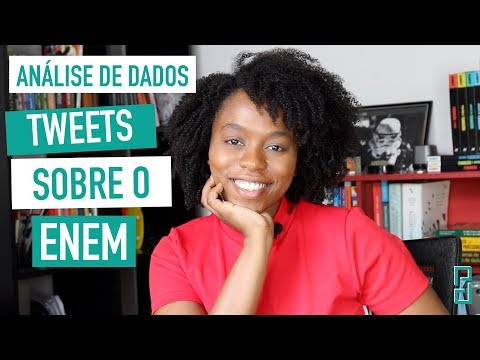

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('RssGfmtyn4A', width=550, height=310))

### **12. Coletando dados a partir de planilhas do Google**

In [ ]:
# https://gspread.readthedocs.io/en/latest/user-guide.html

# instalar a biblioteca gspread 
!pip install --upgrade gspread

# --upgrade -> instala a versao mais recente

  Attempting uninstall: gspread
    Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
planilha = gc.open('municipios')

In [ ]:
pagina = planilha.sheet1
pagina.row_values(1)

['codigo_ibge', 'nome', 'latitude', 'longitude', 'capital', 'codigo_uf']

In [ ]:
pagina.acell('A1').value

'codigo_ibge'

In [ ]:
pagina.cell(1,5).value

'capitAl'

In [ ]:
pagina.update('G1','TESTE')

# apagar
pagina.update('G1','')

{'spreadsheetId': '1A3LgNatMTy6SH8IarzAHW_-T3IZ6yUMcoOZld9AGSJU',
 'updatedCells': 1,
 'updatedColumns': 1,
 'updatedRange': 'dados!G1',
 'updatedRows': 1}

In [ ]:
import pandas as pd

municipios = pd.DataFrame(pagina.get_all_records())
municipios.head()

codigo_ibge                 nome  latitude  longitude  capitAl  codigo_uf
0      5200050      Abadia de Goiás  -167.573   -494.412        0         52
1      3100104  Abadia dos Dourados  -184.831   -473.916        0         31
2      5200100            Abadiânia   -16.197   -487.057        0         52
3      3100203               Abaeté  -191.551   -454.444        0         31
4      1500107           Abaetetuba  -172.183   -488.788        0         15

In [ ]:
rondonia = municipios.query('codigo_uf==11')
rondonia.head()

codigo_ibge                     nome  ...  capitAl  codigo_uf
131      1100015    Alta Floresta D'Oeste  ...        0         11
145      1100379  Alto Alegre dos Parecis  ...        0         11
158      1100403             Alto Paraíso  ...        0         11
179      1100346         Alvorada D'Oeste  ...        0         11
381      1100023                Ariquemes  ...        0         11

[5 rows x 6 columns]

In [ ]:
# obter o numero de linhas e colunas
rondonia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 131 to 5517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   codigo_ibge  52 non-null     int64  
 1   nome         52 non-null     object 
 2   latitude     52 non-null     float64
 3   longitude    52 non-null     float64
 4   capitAl      52 non-null     int64  
 5   codigo_uf    52 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.8+ KB


In [ ]:
# cria uma pagina
municipios_rondonia = planilha.add_worksheet('Rondônia',rows=52, cols=6)

In [ ]:
municipios_rondonia.update([rondonia.columns.values.tolist()] + rondonia.values.tolist())

{'spreadsheetId': '1A3LgNatMTy6SH8IarzAHW_-T3IZ6yUMcoOZld9AGSJU',
 'updatedCells': 318,
 'updatedColumns': 6,
 'updatedRange': "'Rondônia'!A1:F53",
 'updatedRows': 53}

In [ ]:
rondonia.columns.values.tolist()

['codigo_ibge', 'nome', 'latitude', 'longitude', 'capitAl', 'codigo_uf']

In [ ]:
rondonia.values.tolist()

[[1100015, "Alta Floresta D'Oeste", -119.283, -619.953, 0, 11],
 [1100379, 'Alto Alegre dos Parecis', -12.132, -61.835, 0, 11],
 [1100403, 'Alto Paraíso', -971.429, -633.188, 0, 11],
 [1100346, "Alvorada D'Oeste", -113.463, -622.847, 0, 11],
 [1100023, 'Ariquemes', -990.571, -630.325, 0, 11],
 [1100452, 'Buritis', -101.943, -638.324, 0, 11],
 [1100031, 'Cabixi', -134.945, -60.552, 0, 11],
 [1100601, 'Cacaulândia', -10.349, -629.043, 0, 11],
 [1100049, 'Cacoal', -114.343, -614.562, 0, 11],
 [1100700, 'Campo Novo de Rondônia', -105.712, -636.266, 0, 11],
 [1100809, 'Candeias do Jamari', -87.907, -637.005, 0, 11],
 [1100908, 'Castanheiras', -114.253, -619.482, 0, 11],
 [1100056, 'Cerejeiras', -13.187, -608.168, 0, 11],
 [1100924, 'Chupinguaia', -125.611, -608.877, 0, 11],
 [1100064, 'Colorado do Oeste', -131.174, -605.454, 0, 11],
 [1100072, 'Corumbiara', -129.551, -608.947, 0, 11],
 [1100080, 'Costa Marques', -124.367, -64.228, 0, 11],
 [1100940, 'Cujubim', -936.065, -625.846, 0, 11],
 [

**Referência**:

Analise DADOS do Google Sheets com Python usando Google COLAB

https://youtu.be/8vKvsLTLDzs

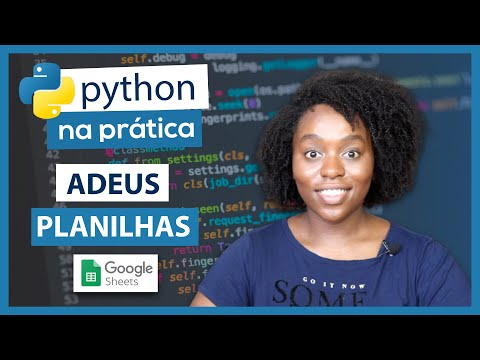

In [ ]:
from IPython.display import YouTubeVideo
display(YouTubeVideo('8vKvsLTLDzs', width=550, height=310))

### **13. Coletando dados eleitorais**

Lendo um arquivo **CSV** a partir do **Google Drive**

>

**Repositório de dados eleitorais**:

> https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

cand_BR = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PLN/Aula 04/consulta_cand_2020_BRASIL.csv", sep=';', encoding='ISO-8859-1')
cand_BR

DT_GERACAO  ... ST_CANDIDATO_INSERIDO_URNA
0       18/10/2020  ...                        NÃO
1       18/10/2020  ...                        NÃO
2       18/10/2020  ...                        NÃO
3       18/10/2020  ...                        NÃO
4       18/10/2020  ...                        NÃO
...            ...  ...                        ...
554973  18/10/2020  ...                        NÃO
554974  18/10/2020  ...                        NÃO
554975  18/10/2020  ...                        NÃO
554976  18/10/2020  ...                        NÃO
554977  18/10/2020  ...                        NÃO

[554978 rows x 63 columns]

In [ ]:
cand_BR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554978 entries, 0 to 554977
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   DT_GERACAO                     554978 non-null  object
 1   HH_GERACAO                     554978 non-null  object
 2   ANO_ELEICAO                    554978 non-null  int64 
 3   CD_TIPO_ELEICAO                554978 non-null  int64 
 4   NM_TIPO_ELEICAO                554978 non-null  object
 5   NR_TURNO                       554978 non-null  int64 
 6   CD_ELEICAO                     554978 non-null  int64 
 7   DS_ELEICAO                     554978 non-null  object
 8   DT_ELEICAO                     554978 non-null  object
 9   TP_ABRANGENCIA                 554978 non-null  object
 10  SG_UF                          554978 non-null  object
 11  SG_UE                          554978 non-null  int64 
 12  NM_UE                          554978 non-nu

In [ ]:
cand_BR['ST_REELEICAO'].value_counts()

N    531316
S     23662
Name: ST_REELEICAO, dtype: int64

In [ ]:
# porcentagem em decimal
cand_BR['ST_REELEICAO'].value_counts(normalize=True)

N    0.957364
S    0.042636
Name: ST_REELEICAO, dtype: float64

In [ ]:
# porcentagem
cand_BR['ST_REELEICAO'].value_counts(normalize=True)*100

N    95.736408
S     4.263592
Name: ST_REELEICAO, dtype: float64

In [ ]:
cand_BR['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)

ENSINO MÉDIO COMPLETO            0.381033
SUPERIOR COMPLETO                0.243044
ENSINO FUNDAMENTAL INCOMPLETO    0.127816
ENSINO FUNDAMENTAL COMPLETO      0.122097
ENSINO MÉDIO INCOMPLETO          0.049634
SUPERIOR INCOMPLETO              0.044782
LÊ E ESCREVE                     0.031562
ANALFABETO                       0.000032
Name: DS_GRAU_INSTRUCAO, dtype: float64

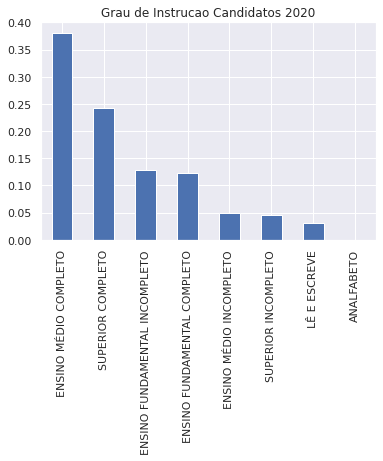

In [ ]:
import seaborn as sns
sns.set()

# use ;
cand_BR['DS_GRAU_INSTRUCAO'].value_counts(normalize=True).plot(kind='bar', title='Grau de Instrucao Candidatos 2020');

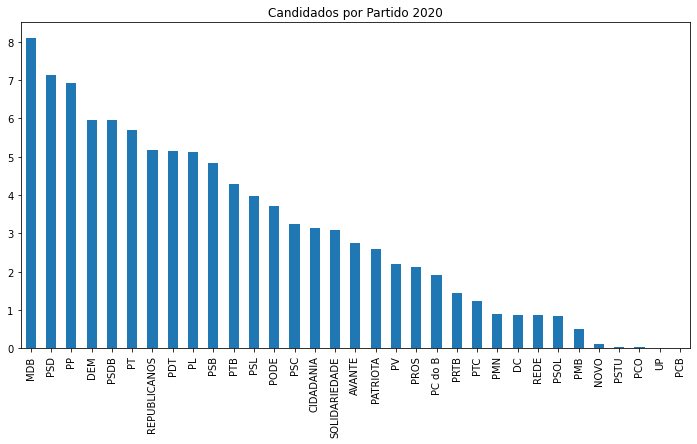

In [ ]:
(100 * cand_BR['SG_PARTIDO'].value_counts(normalize=True)).plot(kind='bar', figsize=(12,6), title='Candidados por Partido 2020');

In [ ]:
cand_BR['NM_URNA_CANDIDATO'].str.contains('BOLSONARO').value_counts()

False    554886
True         89
Name: NM_URNA_CANDIDATO, dtype: int64

In [ ]:
cand_BR[cand_BR['NM_URNA_CANDIDATO'].str.contains('BOLSONARO') == True]

DT_GERACAO  ... ST_CANDIDATO_INSERIDO_URNA
5634    18/10/2020  ...                        NÃO
10253   18/10/2020  ...                        NÃO
10434   18/10/2020  ...                        SIM
12176   18/10/2020  ...                        SIM
14901   18/10/2020  ...                        NÃO
...            ...  ...                        ...
531091  18/10/2020  ...                        SIM
545973  18/10/2020  ...                        SIM
549827  18/10/2020  ...                        NÃO
552845  18/10/2020  ...                        NÃO
554656  18/10/2020  ...                        SIM

[89 rows x 63 columns]

In [ ]:
cand_RJ = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PLN/Aula 04/consulta_cand_2020_RJ.csv", sep=';', encoding='ISO-8859-1')
cand_RJ

DT_GERACAO  ... ST_CANDIDATO_INSERIDO_URNA
0      18/10/2020  ...                        SIM
1      18/10/2020  ...                        SIM
2      18/10/2020  ...                        SIM
3      18/10/2020  ...                        SIM
4      18/10/2020  ...                        NÃO
...           ...  ...                        ...
26347  18/10/2020  ...                        NÃO
26348  18/10/2020  ...                        NÃO
26349  18/10/2020  ...                        NÃO
26350  18/10/2020  ...                        SIM
26351  18/10/2020  ...                        NÃO

[26352 rows x 63 columns]

In [ ]:
cand_RJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26352 entries, 0 to 26351
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     26352 non-null  object
 1   HH_GERACAO                     26352 non-null  object
 2   ANO_ELEICAO                    26352 non-null  int64 
 3   CD_TIPO_ELEICAO                26352 non-null  int64 
 4   NM_TIPO_ELEICAO                26352 non-null  object
 5   NR_TURNO                       26352 non-null  int64 
 6   CD_ELEICAO                     26352 non-null  int64 
 7   DS_ELEICAO                     26352 non-null  object
 8   DT_ELEICAO                     26352 non-null  object
 9   TP_ABRANGENCIA                 26352 non-null  object
 10  SG_UF                          26352 non-null  object
 11  SG_UE                          26352 non-null  int64 
 12  NM_UE                          26352 non-null  object
 13  C

In [ ]:
cand_RJ['ST_REELEICAO'].value_counts(normalize=True)*100

N    97.931846
S     2.068154
Name: ST_REELEICAO, dtype: float64

In [ ]:
cand_RJ[cand_RJ['SG_PARTIDO']=='MDB']['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

ENSINO MÉDIO COMPLETO            40.780142
SUPERIOR COMPLETO                21.187943
ENSINO FUNDAMENTAL COMPLETO      13.563830
ENSINO FUNDAMENTAL INCOMPLETO    12.322695
ENSINO MÉDIO INCOMPLETO           5.496454
SUPERIOR INCOMPLETO               5.230496
LÊ E ESCREVE                      1.418440
Name: DS_GRAU_INSTRUCAO, dtype: float64

In [ ]:
cand_RJ[cand_RJ['SG_PARTIDO']=='NOVO']['DS_GRAU_INSTRUCAO'].value_counts(normalize=True)*100

SUPERIOR COMPLETO              86.885246
SUPERIOR INCOMPLETO             6.557377
ENSINO MÉDIO INCOMPLETO         3.278689
ENSINO FUNDAMENTAL COMPLETO     1.639344
ENSINO MÉDIO COMPLETO           1.639344
Name: DS_GRAU_INSTRUCAO, dtype: float64